<a href="https://colab.research.google.com/github/MarHash/Deep-Learning-Tutorials/blob/main/DL_class_mnist_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# let's see the tensor of one instance of the data
print(x_train[0])

In [ ]:
# we will normalize (scale) the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

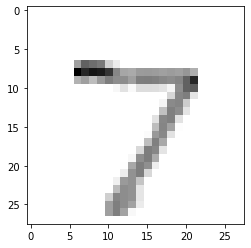

In [18]:
# if we plot the data, it will be the number
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [8]:
# let's create a model
model = tf.keras.models.Sequential()

# first is our input layer, we will flatten the dataset (remember our input is 28x28) using a layer called flatten as an input
model.add(tf.keras.layers.Flatten())

# now we add our dense layers with an activation function, and n neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# now we add our output layer. 10 neurons for 10 classes (0-9). We use softmax becuase this is a probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


# next is training the model
model.compile(optimizer='adam', # the optimizer is usually dependent on an algorithm
              loss='sparse_categorical_crossentropy', # loss is what the network calculates to learn, it will attempt to reduce it as it is learning
              metrics=['accuracy']) # the scoring metric to track

model.fit(x_train, y_train, epochs=8) # epochs is the number of passes through our whole dataset


Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2690 - accuracy: 0.9200
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1064 - accuracy: 0.9666
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0719 - accuracy: 0.9775
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9827
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - accuracy: 0.9868
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9895
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0247 - accuracy: 0.9915
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9927


In [9]:
# we got good accuracy reults, now we check that our model is not overfitting on the test set
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9744
0.1082950308918953 0.974399983882904


In [12]:
# let's save our model
model.save('my-digit-classifier.model')

INFO:tensorflow:Assets written to: my-digit-classifier.model/assets


In [13]:
# let's use the saved model
myModel = tf.keras.models.load_model('my-digit-classifier.model')

In [15]:
# we can also make predictions
preds = myModel.predict([x_test])
preds

array([[4.92191466e-13, 2.53919080e-10, 3.83493948e-09, ...,
        1.00000000e+00, 6.48004653e-13, 3.88375554e-10],
       [3.43166399e-16, 1.72127136e-06, 9.99998331e-01, ...,
        3.75237688e-12, 3.18901637e-14, 5.99597377e-19],
       [9.51150530e-12, 1.00000000e+00, 1.45341206e-09, ...,
        4.08148750e-08, 1.54596123e-08, 1.49856696e-10],
       ...,
       [1.55011349e-14, 7.49392370e-09, 5.31108421e-11, ...,
        1.64477342e-07, 1.89427904e-10, 2.27815899e-08],
       [5.09660639e-14, 1.20484795e-08, 1.33521149e-14, ...,
        2.83922774e-10, 2.66049831e-08, 6.07343323e-16],
       [2.27566854e-10, 9.63003635e-11, 8.03599288e-12, ...,
        1.39687824e-15, 4.73497803e-12, 2.26733123e-15]], dtype=float32)

In [17]:
# note that our predictions are tensors, probably one-hot encoded
# we will use argmax to return the value of the class with the highest possibility

import numpy as np

print(np.argmax(preds[0]))

7
